# Excercise 2b

## Import dependencies

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import ridder
from scipy.stats import describe

## Create functions
Create function $f(x) = \sqrt{\frac{5}{2 \pi x^3}} \exp(- \frac{(x-5)^2}{10x})$.

In [3]:
def f(x):
    if x > 0:
        part1 = np.sqrt(5 / (2 * np.pi * (x ** 3)))
        part2 = -(((x - 5) ** 2) / (10 * x))
        return part1 * np.exp(part2)
    return 0

def F(x):
    return quad(f, -np.inf, x)[0]

## Plot
Create a plot of the function $f(x) = \sqrt{\frac{5}{2 \pi x^3}} \exp(- \frac{(x-5)^2}{10x})$.

## Solve for $F(x) - u = 0$
The simulate sample function solves for the equation $F(x) - u = 0$.

In [4]:
def simulatesample(u: float):
    find_root_of = lambda x: F(x) - u
    return ridder(find_root_of, 0, 100)

## Plot the graph
Plot the graph for the interval $[0.1, 20]$.

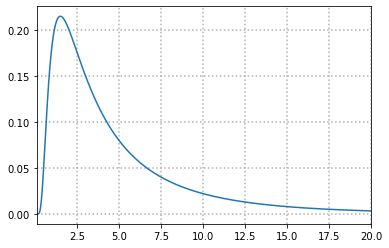

In [6]:
def plot():
    x_array = np.linspace(0.1, 20, 1000)
    y_array = np.empty(1000)
    for i, x in enumerate(x_array):
        y_array[i] = f(x)
        x_array[i] = x
    plt.plot(x_array, y_array)
    plt.xlim([0.1, 20])
    plt.grid(linestyle=":", linewidth=1.5)
    plt.show()

plot()

## Create histogram
Create histrogram in the interval $[0.1, 20]$

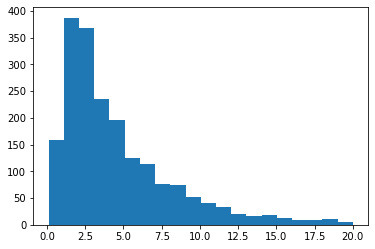

DescribeResult(nobs=2000, minmax=(0.3538345112682532, 53.93997698705634), mean=4.957269584950007, variance=22.200816688120206, skewness=2.7336039639175125, kurtosis=12.288549785699752)


In [10]:
def main():
    n = 2000
    u_array = rnd.random(2000)
    a_array = np.empty(n)

    for i in range(n):
        a_array[i] = simulatesample(u_array[i])

    plt.hist(a_array, 20, range=(0.1, 20))
    plt.show()

    print(describe(a_array))

main()